# 1)

In [ ]:
import json
from pprint import pprint
data = json.load(open('reduced_dblp.json'))

In [52]:
publications = {}
for i in range(len(data)):
    lst = []
    for j in data[i]['authors']:
        lst.append(j['author_id'])
    publications[data[i]['id_publication_int']] = lst

In [53]:
from collections import defaultdict
authors = defaultdict(list)

for key, values in publications.items():
    for value in values:
        authors[value].append(key)

In [54]:
def jaccard_distance(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    if int(union)==0:
        return 0
    return 1-float(intersection / union)

In [55]:
import itertools
import networkx as nx
graph = nx.Graph()

for pub, aut in publications.items():
    if len(aut)>1:
        combos = list(itertools.combinations(aut,2))
        for names in combos:
            graph.add_edge(names[0], names[1], weight = jaccard_distance(authors[names[0]], authors[names[1]]))
    else:
        graph.add_node(aut[0])

In [56]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 904646
Number of edges: 3679297
Average degree:   8.1342


In [57]:
subgraph = nx.ego_graph(graph, 255247, radius=7, center=True, undirected=True, distance=None)

# 2)

In [58]:
from pylab import show
pos = nx.spring_layout(subgraph)

nx.draw_networkx_nodes(subgraph,pos,node_color='b',alpha=1,node_size=30)
nx.draw_networkx_edges(subgraph,pos,alpha=1)
show()

MemoryError: 

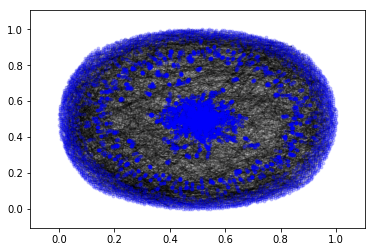

In [39]:
from pylab import show
# create the layout
pos = nx.spring_layout(graph)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(graph,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(graph,pos,alpha=0.1)

# draw the most important nodes with a different style
#nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
#nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

In [7]:
#import matplotlib
#nx.draw(graph,pos=nx.spring_layout(graph)) # use spring layout
#matplotlib.draw(graph)

In [8]:
data[0]['id_conference_int']

3052

In [9]:
conference=input()

3052


In [10]:
data[0]

{'authors': [{'author': 'h&eacute;lio marcos paz de almeida',
   'author_id': 255206},
  {'author': 'dorgival olavo guedes neto', 'author_id': 255207},
  {'author': 'wagner meira jr.', 'author_id': 16585},
  {'author': 'mohammed j. zaki', 'author_id': 255208}],
 'id_conference': 'conf/pkdd/2011-1',
 'id_conference_int': 3052,
 'id_publication': 'conf/pkdd/almeidanmz11',
 'id_publication_int': 161535,
 'title': 'is there a best quality metric for graph clusters?'}

In [11]:
graph.nodes(data=True)

[(255206, {}),
 (255207, {}),
 (16585, {}),
 (255208, {}),
 (255280, {}),
 (255281, {}),
 (3326, {}),
 (20405, {}),
 (20407, {}),
 (255339, {}),
 (205380, {}),
 (115228, {}),
 (210891, {}),
 (255394, {}),
 (255395, {}),
 (255405, {}),
 (9308, {}),
 (175195, {}),
 (17178, {}),
 (176994, {}),
 (73799, {}),
 (24151, {}),
 (255487, {}),
 (255488, {}),
 (3476, {}),
 (255489, {}),
 (166813, {}),
 (13781, {}),
 (9741, {}),
 (8757, {}),
 (255537, {}),
 (21462, {}),
 (255578, {}),
 (113776, {}),
 (255247, {}),
 (82068, {}),
 (255673, {}),
 (255688, {}),
 (255689, {}),
 (255690, {}),
 (255691, {}),
 (113346, {}),
 (15924, {}),
 (255814, {}),
 (200773, {}),
 (93126, {}),
 (23845, {}),
 (208589, {}),
 (127810, {}),
 (255902, {}),
 (255926, {}),
 (9503, {}),
 (9505, {}),
 (9068, {}),
 (9046, {}),
 (9069, {}),
 (9070, {}),
 (255950, {}),
 (255996, {}),
 (20199, {}),
 (124828, {}),
 (239007, {}),
 (189237, {}),
 (255823, {}),
 (256123, {}),
 (256124, {}),
 (8985, {}),
 (8987, {}),
 (8988, {}),
 (1928

In [12]:
conference

'3052'

In [13]:
authors_list=[]
c=int(conference)
for instance in data:
    current_c=int(instance['id_conference_int'])
    if current_c == c:
        for a in instance['authors']:
            if a['author_id'] not in authors_list:
                authors_list.append(a['author_id'])
    
print(authors_list)

[255206, 255207, 16585, 255208, 255280, 255281, 3326, 20405, 20407, 255339, 205380, 115228, 210891, 255394, 255395, 255405, 9308, 175195, 17178, 176994, 73799, 24151, 255487, 255488, 3476, 255489, 166813, 13781, 9741, 8757, 255537, 21462, 255578, 113776, 255247, 82068, 255673, 255688, 255689, 255690, 255691, 113346, 15924, 255814, 200773, 93126, 23845, 208589, 127810, 255902, 255926, 9503, 9505, 9068, 9046, 9069, 9070, 255950, 255996, 20199, 124828, 239007, 189237, 255823, 256123, 256124, 8985, 8987, 8988, 19285, 19460, 8612, 255494, 256146, 256147, 9771, 256148, 20336, 256176, 256177, 255328, 256188, 256159, 256133, 256264, 256265, 256276, 25696, 255805, 72882, 72883, 71582, 71969, 9772, 114626, 114625, 114483, 202882, 256135, 252278, 83637, 83639, 255300, 21056, 70758, 256482, 256500, 20392, 8857, 256366, 255759, 255760, 8874, 19794, 9451, 8350, 8352, 151570, 43462, 9388]


In [14]:
H = graph.subgraph(authors_list)

In [15]:
import matplotlib.pyplot as plt

#nx.draw(H,pos=nx.spring_layout(H)) # use spring layout

In [16]:
map(int, authors_list)


authors ids by ax


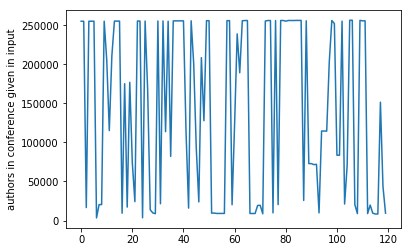

In [17]:
plt.plot(authors_list)
print('authors ids by ax')
plt.ylabel('authors in conference given in input')
plt.show()

In [18]:
import json
from pprint import pprint
full_data = json.load(open('full_dblp.json'))

In [19]:
full_data[0]

{'authors': [{'author': 'pierre seimandi', 'author_id': 1},
  {'author': 'guillaume dufour', 'author_id': 2},
  {'author': 'fran&ccedil;ois rogier', 'author_id': 3}],
 'id_conference': 'conf/iccs/2010',
 'id_conference_int': 1,
 'id_publication': 'journals/procedia/seimandidr10',
 'id_publication_int': 1,
 'title': 'a two scale model of air corona discharges.'}

In [20]:
full_data[5]

{'authors': [{'author': 'andrew dunk', 'author_id': 15},
  {'author': 'adrian haffegee', 'author_id': 16},
  {'author': 'vassil n. alexandrov', 'author_id': 17}],
 'id_conference': 'conf/iccs/2010',
 'id_conference_int': 1,
 'id_publication': 'journals/procedia/dunkha10',
 'id_publication_int': 6,
 'title': 'selection methods for interactive creation and management of objects in 3d immersive environments.'}

In [21]:
###CHANGING  CONFERENCE NAME
conference=1

In [22]:
### make with axes using name of authors
full_list_names={}
for instance in full_data:
    for a in instance['authors']:
        if int(conference)==int(instance['id_conference_int']):
            times=full_list_names.get(a['author'], 0)
            times+=1
            if int(times) != 0:
                full_list_names[a['author']]=times
            else:
                continue

In [23]:
len(full_list_names)

945

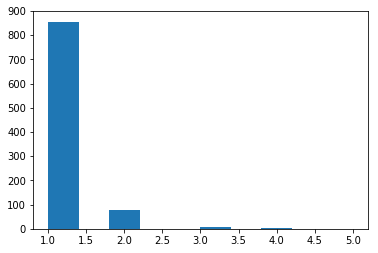

In [24]:
plt.figure()
plt.hist(list(full_list_names.values()))
plt.show()

In [25]:
#for reduced json
list_names={}
for instance in data:
    for a in instance['authors']:
        if int(conference)==int(instance['id_conference_int']):
            
            times=list_names.get(a['author'], 0)
            times+=1
            if times !=0:
                list_names[a['author']]=times
            else:
                continue

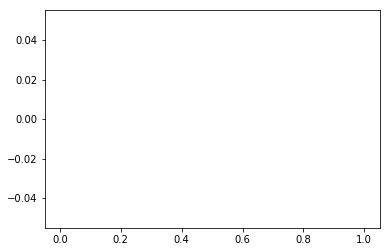

In [26]:
#for reduced json
plt.figure()
plt.hist(list(list_names.values()))
plt.show()
#### NO GRAPH 'CAUSE REDUCED JSON DOESN'T HAVE id_conference_int == 1 

In [27]:
full_publications = {}
for i in range(len(full_data)):
    lst = []
    for j in full_data[i]['authors']:
        lst.append(j['author_id'])
    full_publications[full_data[i]['id_publication_int']] = lst

In [28]:
import itertools
import networkx as nx
full_graph = nx.Graph()

for pub, aut in full_publications.items():
    if len(aut)>1:
        combos = list(itertools.combinations(aut,2))
        for names in combos:
            full_graph.add_edge(names[0], names[1], weight = jaccard_distance(authors[names[0]], authors[names[1]]))
    else:
        full_graph.add_node(aut[0])

In [29]:
len(full_graph)

904646

In [30]:
len(graph)

7771

In [31]:
 ### CALCULATION OF DEGREE CENTRALITY ###

degree_centrality={}
n=len(graph)
for each in graph:
    degree_centrality[each]=len(graph.edges(each))/(n-1)
print(degree_centrality)

{255206: 0.0003861003861003861, 255207: 0.0003861003861003861, 16585: 0.0003861003861003861, 255208: 0.0003861003861003861, 255280: 0.0002574002574002574, 255281: 0.0002574002574002574, 3326: 0.0002574002574002574, 20405: 0.0002574002574002574, 20407: 0.0002574002574002574, 255339: 0.0002574002574002574, 205380: 0.0002574002574002574, 115228: 0.0002574002574002574, 210891: 0.0002574002574002574, 255394: 0.0002574002574002574, 255395: 0.0002574002574002574, 255405: 0.0011583011583011582, 9308: 0.0014157014157014157, 175195: 0.0003861003861003861, 17178: 0.0003861003861003861, 176994: 0.0002574002574002574, 73799: 0.0002574002574002574, 24151: 0.0009009009009009009, 255487: 0.0003861003861003861, 255488: 0.0003861003861003861, 3476: 0.0003861003861003861, 255489: 0.0003861003861003861, 166813: 0.0001287001287001287, 13781: 0.0001287001287001287, 9741: 0.0001287001287001287, 8757: 0.0001287001287001287, 255537: 0.0001287001287001287, 21462: 0.0003861003861003861, 255578: 0.0, 113776: 0.00

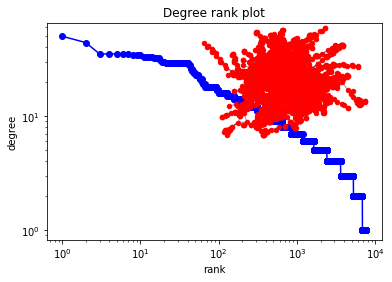

In [32]:
   ### TRY TO PLOT HIST OF DEGREE CENTRALITY FOR GRAPH ###

degree_sequence=sorted(nx.degree(graph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(graph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()
##data rate exceed for full_data

In [33]:
#ABSOLUTE CENTRALITY
centrality={}
s=1.0/(len(graph)-1.0)
centrality=dict((n,d*s) for n,d in graph.degree_iter())

In [34]:
centrality

{255206: 0.00038610038610038604,
 255207: 0.00038610038610038604,
 16585: 0.00038610038610038604,
 255208: 0.00038610038610038604,
 255280: 0.0002574002574002574,
 255281: 0.0002574002574002574,
 3326: 0.0002574002574002574,
 20405: 0.0002574002574002574,
 20407: 0.0002574002574002574,
 255339: 0.0002574002574002574,
 205380: 0.0002574002574002574,
 115228: 0.0002574002574002574,
 210891: 0.0002574002574002574,
 255394: 0.0002574002574002574,
 255395: 0.0002574002574002574,
 255405: 0.0011583011583011582,
 9308: 0.0014157014157014157,
 175195: 0.00038610038610038604,
 17178: 0.00038610038610038604,
 176994: 0.0002574002574002574,
 73799: 0.0002574002574002574,
 24151: 0.0009009009009009008,
 255487: 0.00038610038610038604,
 255488: 0.00038610038610038604,
 3476: 0.00038610038610038604,
 255489: 0.00038610038610038604,
 166813: 0.0001287001287001287,
 13781: 0.0001287001287001287,
 9741: 0.0001287001287001287,
 8757: 0.0001287001287001287,
 255537: 0.0001287001287001287,
 21462: 0.00038

In [35]:
#FOR REDUCED GRAPH
betweeness_centrality={}
n=len(graph)
denom=n**2 - 3*n + 2
for id_author in centrality.keys():    
    betweeness_centrality[id_author]=centrality[id_author]/denom


In [36]:
betweeness_centrality

{255206: 6.396083071474973e-12,
 255207: 6.396083071474973e-12,
 16585: 6.396083071474973e-12,
 255208: 6.396083071474973e-12,
 255280: 4.264055380983316e-12,
 255281: 4.264055380983316e-12,
 3326: 4.264055380983316e-12,
 20405: 4.264055380983316e-12,
 20407: 4.264055380983316e-12,
 255339: 4.264055380983316e-12,
 205380: 4.264055380983316e-12,
 115228: 4.264055380983316e-12,
 210891: 4.264055380983316e-12,
 255394: 4.264055380983316e-12,
 255395: 4.264055380983316e-12,
 255405: 1.9188249214424923e-11,
 9308: 2.345230459540824e-11,
 175195: 6.396083071474973e-12,
 17178: 6.396083071474973e-12,
 176994: 4.264055380983316e-12,
 73799: 4.264055380983316e-12,
 24151: 1.4924193833441603e-11,
 255487: 6.396083071474973e-12,
 255488: 6.396083071474973e-12,
 3476: 6.396083071474973e-12,
 255489: 6.396083071474973e-12,
 166813: 2.132027690491658e-12,
 13781: 2.132027690491658e-12,
 9741: 2.132027690491658e-12,
 8757: 2.132027690491658e-12,
 255537: 2.132027690491658e-12,
 21462: 6.3960830714749

In [37]:
'''
u=None
distance=None
normalized=True
'''

'\nu=None\ndistance=None\nnormalized=True\n'

In [38]:
'''
def closeness(g, u, distance, normalized):
    if distance is not None:
            # use Dijkstra's algorithm with specified attribute as edge weight 
        path_length = functools.partial(nx.single_source_dijkstra_path_length,
                                        weight=distance)
    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = g.nodes()
    else:
        nodes = [u]
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(g,n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(g) > 1:
            closeness_centrality[n] = (len(sp)-1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if normalized:
                s = (len(sp)-1.0) / ( len(g) - 1 )
                closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    if u is not None:
        return closeness_centrality[u]
    else:
        return closeness_centrality
'''


"\ndef closeness(g, u, distance, normalized):\n    if distance is not None:\n            # use Dijkstra's algorithm with specified attribute as edge weight \n        path_length = functools.partial(nx.single_source_dijkstra_path_length,\n                                        weight=distance)\n    else:\n        path_length = nx.single_source_shortest_path_length\n\n    if u is None:\n        nodes = g.nodes()\n    else:\n        nodes = [u]\n    closeness_centrality = {}\n    for n in nodes:\n        sp = path_length(g,n)\n        totsp = sum(sp.values())\n        if totsp > 0.0 and len(g) > 1:\n            closeness_centrality[n] = (len(sp)-1.0) / totsp\n            # normalize to number of nodes-1 in connected part\n            if normalized:\n                s = (len(sp)-1.0) / ( len(g) - 1 )\n                closeness_centrality[n] *= s\n        else:\n            closeness_centrality[n] = 0.0\n    if u is not None:\n        return closeness_centrality[u]\n    else:\n        retu

In [ ]:
#closeness_values=closeness(full_graph, u, distance, normalized)
#closeness_values_reduced=closeness(graph, u, distance, normalized)

In [ ]:
'''
closeness_centrality={}
for node in graph:
    tot=0
    for node2 in graph:
        if node!=node2:
            try:
                tot+=len(nx.dijkstra_path(graph,node,node2))
                #maybe is better to use shortest_path's function
            except nx.NetworkXNoPath:
                tot+=0
    closeness_centrality[node]=tot
'''

# 3)

In [1]:
import heapq
def dijkstra(graph, source, destination):
    prelim = [(0, source)]
    visited = set()
    while destination not in visited:
        (distance, node) = heapq.heappop(prelim)
        if node not in visited:
            visited.add(node)
            for (edge, dist) in graph[node].items():
                heapq.heappush(prelim, (distance + dist['weight'], edge))
    return distance

In [ ]:
dijkstra(graph, 256176, 255207)